In [7]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


In [8]:
# Constants
planck_constant = 6.62607004e-34  # m^2 kg/s
speed_of_light = 299792458  # m/s
boltzmann_constant = 1.38064852e-23 #J/K

In [9]:
# Assumptions
temperature = 5800
flux_sun = 1361

wavelength_range = np.linspace(0, 9000e-9, 500)

wavelength_band_lowest = 400e-9
wavelength_band_highest = 800e-9
wavelength_range_band = np.linspace(wavelength_band_lowest, wavelength_band_highest, 50)
# wavelength_range = np.linspace(200e-9,1200e-9) 

## Black Body Radiation



### Radiation

In [10]:
def radiative_spectral_emittance(wavelength_, temperature_):
    """
    The radiation from a black body at a given
    wavelength and temperature is given by
    :param wavelength_: in m
    :param temperature_: in kelvin
    :return:
    """

    I_star = (2 * np.pi * planck_constant * speed_of_light ** 2) / \
             (wavelength_ ** 5 * (np.exp(
                 planck_constant * speed_of_light / (wavelength_ * boltzmann_constant * temperature_)) - 1))
    return I_star  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


(2e-07, 1.2e-06)

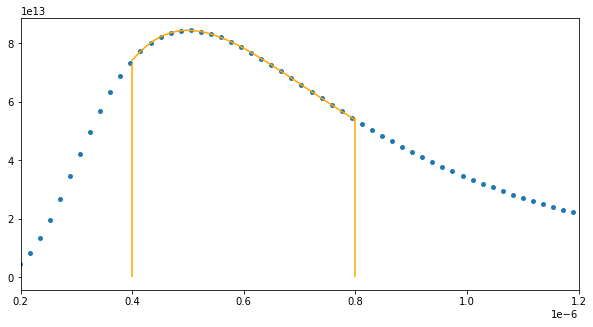

In [11]:
# depends on wavelength_range, temperature
radiation_W_m2_m = radiative_spectral_emittance(wavelength_range, temperature)
radiation_W_m2_m_band = radiative_spectral_emittance(wavelength_range_band, temperature)
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(wavelength_range, radiation_W_m2_m, s=15)
ax.plot(wavelength_range_band, radiation_W_m2_m_band, c='orange')
index_bottom = np.min((np.where((wavelength_range) > (wavelength_band_lowest - 0.00000001))))
index_top = np.max((np.where((wavelength_range) < (wavelength_band_highest + 0.00000001))))
ax.vlines(x=400e-9, ymin=0, ymax=radiation_W_m2_m[index_bottom], color='orange')
ax.vlines(x=800e-9, ymin=0, ymax=radiation_W_m2_m[index_top], color='orange')
ax.set_xlim(200e-9,1200e-9)
 

### Flux

In [18]:
def radiant_flux_perratioflux_integral(lambda_interval_bottom_, lambda_interval_top_, temperature_):
    """
    Equation 2.7 from Gabor thesis
    :param lambda_interval_bottom_: integral limit
    :param lambda_interval_top_: integral limit
    :param temperature_:
    :return:
    """
    F_star_fluxratio = quad(radiative_spectral_emittance, lambda_interval_bottom_, lambda_interval_top_,
                            args=temperature_)
    return F_star_fluxratio


def radiant_flux_calculator(flux_sun_, lambda_interval_bottom_, lambda_interval_top_, temperature_):
    """
    Total power in Watts/m^2
    :param flux_sun_:
    :param lambda_interval_bottom_:
    :param lambda_interval_top_:
    :param temperature_:
    :return:
    """
    flux_star_fluxratio = radiant_flux_perratioflux_integral(lambda_interval_bottom_, lambda_interval_top_, temperature_)
    radiant_flux = np.sqrt(flux_sun_ * flux_star_fluxratio[0])
    radiant_flux_error = ((1/2)*np.sqrt(flux_sun_ * flux_star_fluxratio[0])/(flux_star_fluxratio[0]))*flux_star_fluxratio[1]
    return radiant_flux, radiant_flux_error

In [19]:
radiant_flux, radiant_flux_error = radiant_flux_calculator(flux_sun,
                                                           lambda_interval_bottom_=wavelength_band_lowest,
                                                                      lambda_interval_top_= wavelength_band_highest,
                                                                      temperature_=temperature)

print('F_star [W/m^2]: ', radiant_flux)

F_star [W/m^2]:  200671.64687246917
